# Import Dataset

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import ast
import sys

plt.style.use("seaborn")

df = pd.read_csv('titles.csv')
df2= pd.read_csv('credits.csv')

df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

# Finding Null Values for each Column

In [488]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [489]:
missing_values = df.isna().sum()

sum=0
for i in range(len(missing_values)):
    sum= missing_values.values[i]+sum

print("Total missing values found :",sum)

Total missing values found : 8306


In [490]:
cat_cols = {
    'type': 0, 
    'release_year': 0, 
    'age_certification': 0 
}

for col_ in cat_cols.keys():
    cat_cols[col_] += len(df[col_].value_counts().to_dict().keys())

print(cat_cols)

{'type': 2, 'release_year': 67, 'age_certification': 11}


# Creating a function for fixing the Values

In [491]:
def fix(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [492]:
df["production_countries"] = df["production_countries"].apply(fix)
df["genres"] = df["genres"].apply(fix)

In [493]:
columns_to_fill = ("imdb_score", "tmdb_score", "tmdb_popularity")

for col_ in columns_to_fill:
    df[col_].fillna(0.0, inplace=True)

In [494]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,0.0,NaN,0.600,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime,US,NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,GB,NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7


# Total Movies and Shows

Total Movies: 3759
Total Shows: 2047


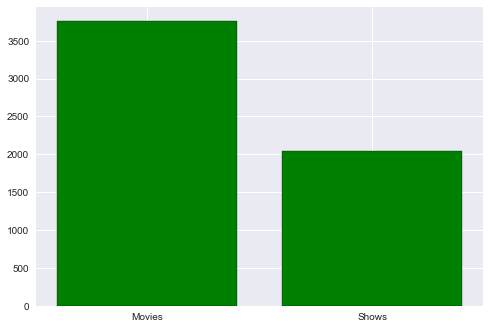

In [495]:
movies = df[df["type"] == "MOVIE"].count()["type"]
shows = df[df["type"] == "SHOW"].count()["type"]

x=[movies,shows]
y=["Movies","Shows"]

print(f"Total Movies: {movies}")
print(f"Total Shows: {shows}")

plt.bar(y,x,color="green",edgecolor="black")
plt.show()

# Runtimes of Movies between 2000 and 2022

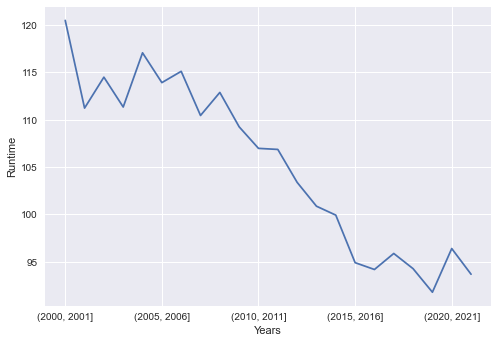

In [481]:
df.groupby(pd.cut(df['release_year'],np.arange(2000,2023))).apply(lambda x: x[x['type'] == 'MOVIE' ]['runtime'].mean()).plot()
plt.ylabel('Runtime')
plt.xlabel('Years')
plt.show()

# Shows and Movies released each year

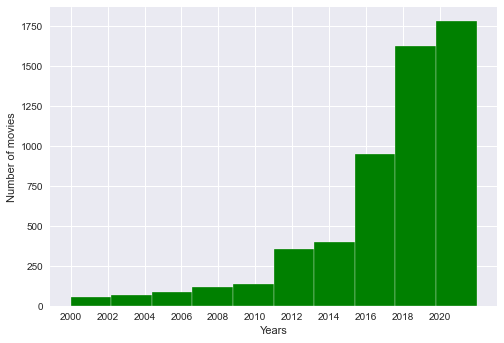

In [497]:
plt.hist(df['release_year'], range=(2000,2022), bins=10,color = "green", ec="white")
plt.ylabel('Number of movies and shows')
plt.xlabel('Years')
plt.xticks(np.arange(2000, 2022, 2))
plt.show()

# Creatig WordCloud image for "description" column

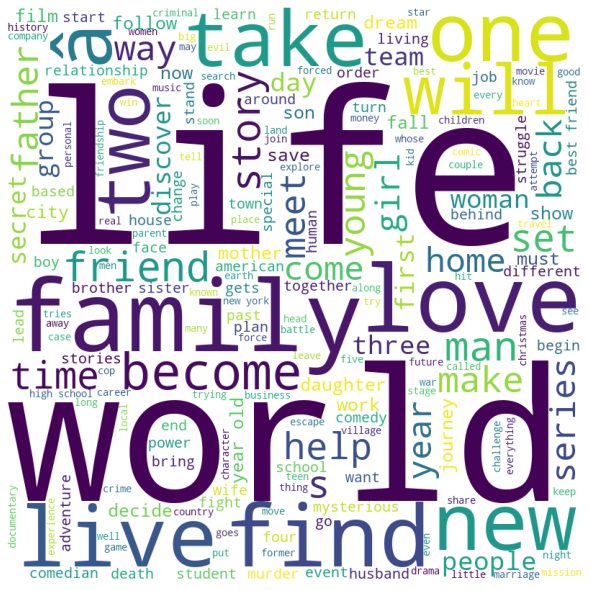

In [467]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS


df = pd.read_csv(r"titles.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df['description']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Average Shows and movies IMDB scores

Average IMDB Score for Movies : 6.27
Average IMDB Score for Shows : 7.02


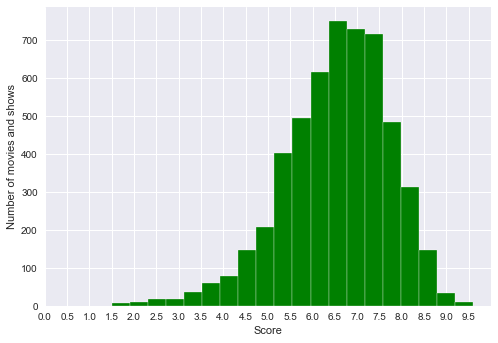

In [468]:
plt.hist(df['imdb_score'], bins=20,color = "green", ec="white")

plt.ylabel('Number of movies and shows')
plt.xlabel('Score')
plt.xticks(np.arange(0, 10, 0.5))
print(f"Average IMDB Score for Movies : {df.loc[df['type'] == 'MOVIE', 'imdb_score'].mean():.2f}")
print(f"Average IMDB Score for Shows : {df.loc[df['type'] == 'SHOW', 'imdb_score'].mean():.2f}")
plt.show()